<a href="https://colab.research.google.com/github/Abrar171041075/Deep-Learning/blob/main/Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore') # to ignore any warning you might see in the code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing dataset
no_malaria = "/content/drive/MyDrive/Malaria/cell_images/Uninfected" #uninfected as no_malaria
malaria = "/content/drive/MyDrive/Malaria/cell_images/Parasitized" #parasitized as malaria
image_size = 64  #pixel size per dimension

In [ ]:
from tqdm import tqdm
import os  # used for IO operation like dealing with directories and files
import cv2  # this package for computer vision
import numpy as np
import matplotlib.pyplot as plt

m_data = [] 
label = []


In [ ]:
# import, convert gray scale, and resize training set images for class 'messy':
for image in tqdm(os.listdir(no_malaria)): # listdir to list all files in that directory
    path = os.path.join(no_malaria, image) # folder of the parasitized sample images
    img = cv2.imread(path)  
    img = cv2.resize(img, (image_size, image_size))# resize the image size to 64 pixels * 64 pixels
    np_img=np.asarray(img) # convert it to numpy array for visualisations
    m_data.append(img)     # append the 'uninfected' images to the  main dataframe
    label.append(0)   #append '0' meaning no malaria
    
for image2 in tqdm(os.listdir(malaria)): 
    path = os.path.join(malaria, image2)# folder of the parasitized sample images
    img2 = cv2.imread(path) 
    img2 = cv2.resize(img2, (image_size, image_size)) # resize the image size to 64 pixels * 64 pixels 
    np_img2 =np.asarray(img2)
    m_data.append(img2)     # append the 'infected' images to the  main dataframe
    label.append(1)  #append '1' meaning no malaria


100%|██████████| 13779/13779 [07:33<00:00, 30.41it/s] 


In [ ]:
# # import, convert gray scale, and resize training set images for class 'messy':
# for image in tqdm(os.listdir(no_malaria)): # listdir to list all files in that directory
#     path = os.path.join(no_malaria, image) # folder of the parasitized sample images
#     #print(path)
#     img = cv2.imread(path)  
#     if(type(image)== type(None)):
#       pass
#     else: 
#       img = cv2.resize(img, (image_size, image_size))# resize the image size to 64 pixels * 64 pixels
#     np_img=np.asarray(img) # convert it to numpy array for visualisations
#     m_data.append(img)     # append the 'uninfected' images to the  main dataframe
#     label.append(0)   #append '0' meaning no malaria
    
# for image2 in tqdm(os.listdir(malaria)): 
#     path = os.path.join(malaria, image2)# folder of the parasitized sample images
#     #print(path)
#     img2 = cv2.imread(path) 
#     if(type(image)== type(None)):
#       pass
#     else: 
#       img2 = cv2.resize(img2, (image_size, image_size))
#     #img2 = cv2.resize(img2, (image_size, image_size)) # resize the image size to 64 pixels * 64 pixels 
#     np_img2 =np.asarray(img2)
#     m_data.append(img2)     # append the 'infected' images to the  main dataframe
#     label.append(1)  #append '1' meaning  malaria


Text(0.5, 1.0, 'Infected malaria cells')

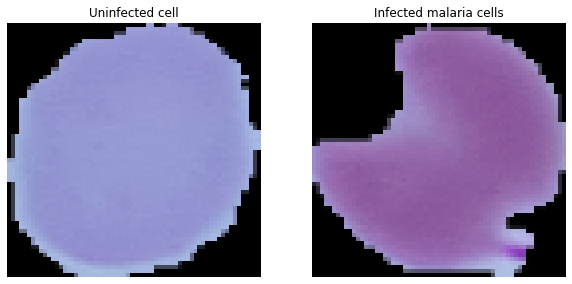

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img)
plt.axis('off')
plt.title("Uninfected cell")
plt.subplot(1, 2, 2)
plt.imshow(np_img2)
plt.axis('off')
plt.title("Infected malaria cells")

In [ ]:
#dimension of ARRAY dataset (64, 64,3)
m_data = np.array(m_data)
m_data.shape

(27562, 64, 64, 3)

In [ ]:
#converting layers to categories and print shape
from tensorflow.keras.utils import to_categorical
label = to_categorical(np.array(label))
label.shape

(27562, 2)

In [ ]:
#train and test set split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(m_data, label, test_size=0.2, random_state=24)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#model building
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=2, activation='softmax')) #2 units for the two classes

#Model Compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# using early stopping to control epochs by monitoring 'loss'
callbacks = EarlyStopping(monitor='loss', patience=3)

In [ ]:
np.random.seed(24)
history = model.fit(X_train, y_train, batch_size = 64, verbose = 1, epochs = 20, validation_data = (X_test, y_test), callbacks = [callbacks])

Epoch 1/20
345/345 [==============================] - 123s 354ms/step - loss: 1.4425 - accuracy: 0.5027 - val_loss: 0.6928 - val_accuracy: 0.4965
Epoch 2/20
345/345 [==============================] - 120s 347ms/step - loss: 0.6922 - accuracy: 0.5236 - val_loss: 0.6911 - val_accuracy: 0.5184
Epoch 3/20
345/345 [==============================] - 120s 348ms/step - loss: 0.6866 - accuracy: 0.5510 - val_loss: 0.6864 - val_accuracy: 0.5335
Epoch 4/20
345/345 [==============================] - 120s 348ms/step - loss: 0.6660 - accuracy: 0.6040 - val_loss: 0.6882 - val_accuracy: 0.5556
Epoch 5/20
345/345 [==============================] - 120s 348ms/step - loss: 0.5180 - accuracy: 0.7336 - val_loss: 0.2424 - val_accuracy: 0.9195
Epoch 6/20
345/345 [==============================] - 118s 342ms/step - loss: 0.2235 - accuracy: 0.9278 - val_loss: 0.1806 - val_accuracy: 0.9427
Epoch 7/20
345/345 [==============================] - 118s 342ms/step - loss: 0.1805 - accuracy: 0.9427 - val_loss: 0.1537 -

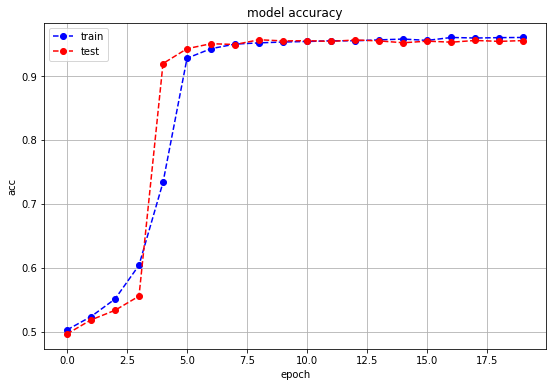

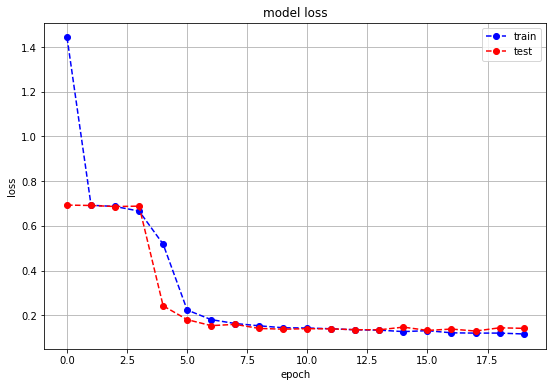

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.figure(figsize=(9,6))
plt.plot(history.history['accuracy'], 'bo--', label="accuracy")
plt.plot(history.history['val_accuracy'], 'ro--', label="val_accuracy")
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(9,6))
plt.plot(history.history['loss'], "bo--", label="loss")
plt.plot(history.history['val_loss'], "ro--", label = "val_loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper right')
plt.show()

173/173 [==============================] - 8s 43ms/step


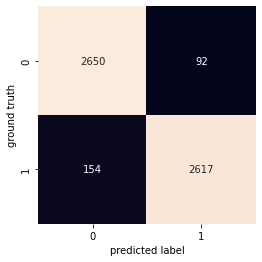

In [ ]:
#confusion matrix:
from sklearn.metrics import confusion_matrix
import seaborn as sns

preds = model.predict(X_test) #gets the prediction prob
preds = preds.argmax(axis=1)
y_true = y_test.argmax(axis=1)
mat = confusion_matrix(y_true, preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('ground truth')
plt.show()

In [ ]:
# classification report:
from sklearn.metrics import classification_report
y_true = y_test.argmax(axis=1)
print(classification_report(y_true,preds))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2742
           1       0.97      0.94      0.96      2771

    accuracy                           0.96      5513
   macro avg       0.96      0.96      0.96      5513
weighted avg       0.96      0.96      0.96      5513



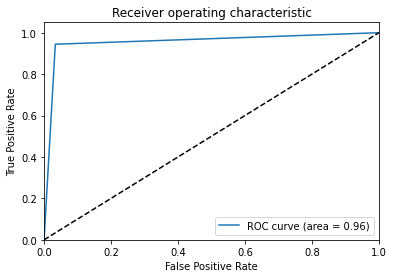

In [ ]:
#ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, preds)
roc_auc = auc(fpr, tpr)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

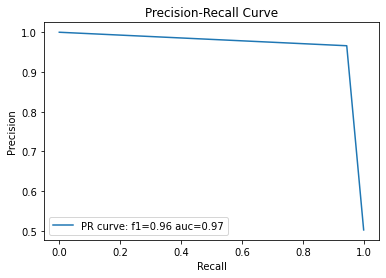

In [ ]:
#pr curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

precision, recall, _ = precision_recall_curve(y_true, preds)
f1, auc = f1_score(y_true, preds), auc(recall, precision)

# plot the precision-recall curves
plt.plot(recall, precision, label='PR curve: f1=%.2f auc=%.2f' % (f1, auc))
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
# show the legend
plt.legend()
# show the plot
plt.show()